# 1. Activating Google Colab drive



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Importing libraries

In [3]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.1)


In [0]:
import gensim
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from gensim import corpora,models
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import CoherenceModel
#import pyLDAvis.gensim
import pickle 
#import pyLDAvis
from scipy.sparse import dok_matrix
from scipy.sparse import csr_matrix, issparse
import warnings
import keras
from keras.preprocessing.text import *
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras.layers import Embedding, Reshape, concatenate, dot
warnings.filterwarnings('ignore')
import collections
from numpy import dot
from numpy.linalg import norm
from sklearn.manifold import TSNE

# 3. Loading dataset

In [5]:
#Reading in cleaned dataset
df = pd.read_csv('/content/drive/My Drive/cleaned_preprocessed_dataset_with_only_nouns_and_title.csv',index_col=0)
df = df.iloc[:100000,:]

#Removing the string quotes from the documents
df['Title'] = df['Title'].apply(lambda x: str(x).split(' '))
df.head()

,Title
0,"[check, image, mime, type]"
1,"[prevent, firefox, press, ctrl-w]"
2,"[r, error, type, list]"
3,"[character, url]"
4,"[contact, detail]"


# 4. Creating baseline gensim word2vec model

In [6]:
# Python program to generate word vectors using Word2Vec 

data = df['Title']

# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, 
              size = 100, window = 5) 

# Print results 
print("Cosine similarity between 'error' " +
      "and 'java' - CBOW : ", 
  model1.similarity('error', 'java')) 
  
print("Cosine similarity between 'query' " +
        "and 'sql' - CBOW : ", 
  model1.similarity('query', 'sql')) 

# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                      window = 5, sg = 1) 

# Print results 
print("Cosine similarity between 'error' " +
    "and 'java' - Skip Gram : ", 
  model2.similarity('error', 'java')) 
  
print("Cosine similarity between 'query' " +
      "and 'sql' - Skip Gram : ", 
  model2.similarity('query', 'sql')) 


Cosine similarity between 'error' and 'java' - CBOW :  0.8990413
Cosine similarity between 'query' and 'sql' - CBOW :  0.90549123
Cosine similarity between 'error' and 'java' - Skip Gram :  0.716577
Cosine similarity between 'query' and 'sql' - Skip Gram :  0.8301094


In [0]:
model2['sql']

array([-0.30282348, -0.9496471 , -0.5226345 ,  0.26200083, -0.8118052 ,
       -0.79277647, -0.626914  , -0.30445635, -0.38363576, -0.5974325 ,
       -0.37419158,  0.18005748, -0.5121893 ,  0.39579412,  0.36101434,
       -0.8041993 , -0.35892436,  0.6597957 , -0.3812191 , -0.05900786,
        0.2171339 , -0.09975578,  0.7881082 , -0.3992784 , -0.27722615,
       -0.49420732, -0.22524461,  0.9534759 , -0.6094947 ,  0.47349095,
        0.21147153, -0.03976802,  0.38954768, -0.332425  ,  0.28015652,
        0.02155537, -0.47495583, -0.08533897,  0.08314294, -0.42759678,
        0.89662313,  0.6611946 ,  0.4707342 , -0.60999954, -0.18627393,
       -1.02662   ,  0.37953323, -0.0759666 ,  0.43473706,  0.64623153,
       -0.5212301 ,  0.20896046,  0.37752217,  0.08495614,  0.2748878 ,
       -0.45743093, -0.43673977,  0.06174003,  0.31876886,  0.47545016,
        0.3369416 ,  0.5416906 , -0.42107254,  0.5313913 , -0.30472305,
       -0.04449001, -0.04870217,  0.15722105,  0.09802415,  0.28

In [0]:
model2.most_similar('sql')

[('oracle', 0.9214755892753601),
 ('mysql', 0.9120404720306396),
 ('postgresql', 0.9059195518493652),
 ('sqlfilestream', 0.8969281911849976),
 ('insert', 0.8966274261474609),
 ('sqlite', 0.8962869048118591),
 ('procedure', 0.8844133615493774),
 ('clause', 0.883175790309906),
 ('pl/sql', 0.8824130296707153),
 ('postgres', 0.8771764039993286)]

In [0]:
model2.most_similar('python')

[('perl', 0.9455664157867432),
 ('haskell', 0.9155502319335938),
 ('pipe', 0.901424765586853),
 ('find', 0.8933221101760864),
 ('java', 0.8929288387298584),
 ('everything', 0.8926974534988403),
 ('batch', 0.8923178315162659),
 ('cgi', 0.892099142074585),
 ('construct', 0.8912663459777832),
 ('quote', 0.8907930254936218)]

In [0]:
model2.most_similar('jquery')

[('javascript', 0.8971030712127686),
 ('js', 0.8952629566192627),
 ('ie', 0.8801975250244141),
 ('div', 0.8779191374778748),
 ('fancybox', 0.8761048316955566),
 ('dojo', 0.8757596611976624),
 ('href', 0.8739073872566223),
 ('ajax', 0.8734673261642456),
 ('selector', 0.872933030128479),
 ('ie7', 0.8726235032081604)]

In [0]:
model2.most_similar('database')

[('db', 0.9666591286659241),
 ('sqlite', 0.9466848373413086),
 ('databases', 0.9420025944709778),
 ('update', 0.9361650943756104),
 ('bulk', 0.9291683435440063),
 ('migration', 0.9206385612487793),
 ('blob', 0.9176408648490906),
 ('ms', 0.9155426621437073),
 ('proc', 0.9153767824172974),
 ('oracle', 0.915184736251831)]

In [0]:
model2.most_similar('error')

[('try', 0.9003514051437378),
 ('token', 0.8893887996673584),
 ('throw', 0.8802858591079712),
 ('errors', 0.8802573680877686),
 ('compilation', 0.8751614689826965),
 ('trouble', 0.8704228401184082),
 ('exceptions', 0.8675388097763062),
 ('catch', 0.8670191168785095),
 ('syntax', 0.8655023574829102),
 ('warn', 0.8630725145339966)]

# 4. Model evaluation

In [0]:
def gensim_w2v(data,min_count,size,window,sg):
  # Python program to generate word vectors using Word2Vec 
  
  # Create CBOW model 
  model1 = gensim.models.Word2Vec(data, min_count = min_count, 
                size = size, window = window,sg=sg) 

  # Print results 
  print("Cosine similarity between 'error' " +
        "and 'java' - CBOW : ", 
    model1.similarity('error', 'java')) 
    
  print("Cosine similarity between 'query' " +
          "and 'sql' - CBOW : ", 
    model1.similarity('query', 'sql')) 
  return model1

In [8]:
model = gensim_w2v(df['Title'],100,100,5,1)

Cosine similarity between 'error' and 'java' - CBOW :  0.6000823
Cosine similarity between 'query' and 'sql' - CBOW :  0.6458842


# 4.1 Euclidian similarity

In [0]:
model.most_similar('error')

[('try', 0.7879581451416016),
 ('errors', 0.7698562145233154),
 ('throw', 0.7697243690490723),
 ('syntax', 0.734272837638855),
 ('exception', 0.7162494659423828),
 ('trouble', 0.7160804271697998),
 ('catch', 0.6958049535751343),
 ('miss', 0.6940738558769226),
 ('modules', 0.6852979063987732),
 ('delphi', 0.6843620538711548)]

In [0]:
model.most_similar('sql')

[('mysql', 0.8251298666000366),
 ('oracle', 0.8180301189422607),
 ('insert', 0.78590989112854),
 ('postgresql', 0.7800630331039429),
 ('ms', 0.7361915111541748),
 ('procedure', 0.7341510057449341),
 ('statement', 0.7159909605979919),
 ('statements', 0.710970401763916),
 ('db', 0.7078589200973511),
 ('join', 0.6999428272247314)]

- *size*: The number of dimensions of the embeddings and the default is 100.
- window: The maximum distance between a target word and words around the target word. The default window is 5.
- *min_count*: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
- *workers*: The number of partitions during training and the default workers is 3.
- *sg*: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

# 4.2 Cosine similarity

In [0]:
def cos_dist (model,word,target_list,num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    errors = 0
    for item in target_list :
        try:
          if item != word :
              b = model[item]
              cos_sim = dot(a, b)/(norm(a)*norm(b))
              cosine_dict[item] = cos_sim
        except: 
          errors = errors + 1
          continue
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    print ("Total errors: ",errors)
    print ()
    print ('Cosine similarity')
    return word_list[0:num]

In [10]:
#Creating word dictionary from the dataset
dictionary = corpora.Dictionary(df['Title'])
dict_unique = []

for i,j in dictionary.iteritems():
  dict_unique.append(j)

pd.Series(dict_unique).unique()

array(['check', 'image', 'mime', ..., 'searchfield-results-decoration',
       'commit/rollback', 'climits'], dtype=object)

In [11]:
# only get the unique Maker_Model
Maker_Model = list(dict_unique) 
word = 'excel'
# Show the most similar Mercedes-Benz SLK-Class by cosine distance 
pprint.pprint (cos_dist(model2,word,Maker_Model,5))
print ()
print ("Euclidian similarity")
pprint.pprint(model2.similar_by_word(word,5))

Total errors:  0

Cosine similarity
[('sheet', 0.97273594),
 ('vba', 0.97227526),
 ('paste', 0.9486923),
 ('csv', 0.94672966),
 ('columns', 0.93881583)]

Euclidian similarity
[('sheet', 0.9727358818054199),
 ('vba', 0.9722752571105957),
 ('paste', 0.9486923217773438),
 ('csv', 0.9467296004295349),
 ('columns', 0.9388158321380615)]


([<matplotlib.axis.XTick at 0x7f28169d9b70>,
 <a list of 30 Text xticklabel objects>)

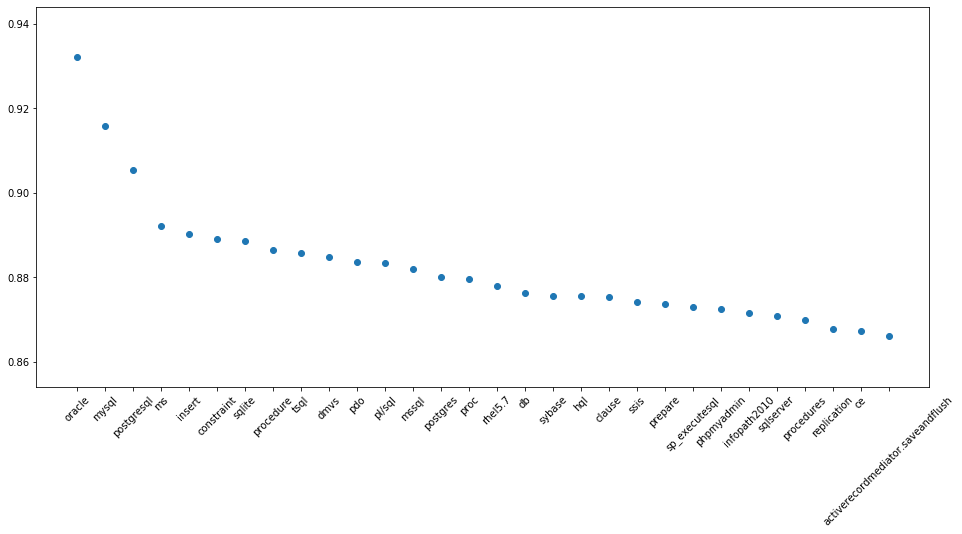

In [30]:
sim = model2.similar_by_word('sql',30)
words = list(list(zip(*sim))[0])
word_sim = list(list(zip(*sim))[1])
plt.figure(figsize=(16,7))
plt.scatter(range(len(word_sim)),word_sim)
plt.xticks(range(30),words,rotation=45)

([<matplotlib.axis.XTick at 0x7f28168ed2e8>,
 <a list of 30 Text xticklabel objects>)

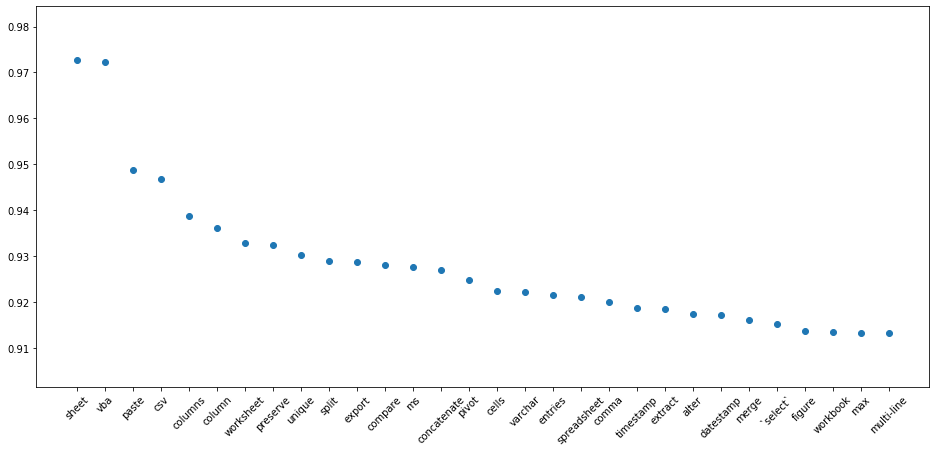

In [31]:
sim = model2.similar_by_word('excel',30)
words = list(list(zip(*sim))[0])
word_sim = list(list(zip(*sim))[1])
plt.figure(figsize=(16,7))
plt.scatter(range(len(word_sim)),word_sim)
plt.xticks(range(30),words,rotation=45)

([<matplotlib.axis.XTick at 0x7f28167915f8>,
 <a list of 30 Text xticklabel objects>)

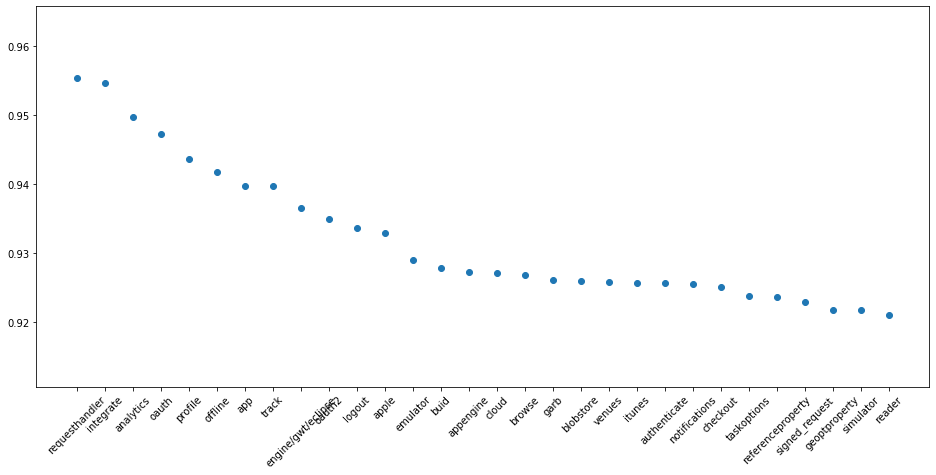

In [35]:
sim = model2.similar_by_word('apps',30)
words = list(list(zip(*sim))[0])
word_sim = list(list(zip(*sim))[1])
plt.figure(figsize=(16,7))
plt.scatter(range(len(word_sim)),word_sim)
plt.xticks(range(30),words,rotation=45)

In [0]:
sim = model2.similar_by_word('sql',30)
words = list(list(zip(*sim))[0])
word_sim = list(list(zip(*sim))[1])
plt.figure(figsize=(16,7))
plt.scatter(range(len(word_sim)),word_sim)
plt.xticks(range(30),words,rotation=45)

# 5. t-SNE visualization

In [0]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [0]:
display_closestwords_tsnescatterplot(model2, 'sql') 

TypeError: ignored

In [0]:
arr = np.empty((0,50), dtype='f')
arr

array([], shape=(0, 50), dtype=float32)

In [0]:
np.array([model[word]])

array([[ 0.22041248, -0.04521446, -0.12320242,  0.22089407, -0.16705196,
        -0.18291423, -0.21378814, -0.10671777, -0.08907652, -0.3125418 ,
        -0.02967571, -0.3140548 , -0.355487  ,  0.14275776, -0.2293928 ,
        -0.3368895 , -0.13549045, -0.0220013 , -0.20025767,  0.04728619,
        -0.05513953, -0.13476716,  0.4099875 , -0.27719152,  0.15409099,
        -0.31129402,  0.2022358 ,  0.21705942, -0.08851268,  0.34217608,
         0.19555663,  0.04192792,  0.3024785 , -0.11752047, -0.03011345,
         0.06180807,  0.07364031,  0.21626031,  0.12259272, -0.19613928,
         0.19245483,  0.30928168,  0.14615993, -0.29705894, -0.36665294,
        -0.42941362,  0.2995239 ,  0.07898968,  0.15064926,  0.33343846,
        -0.04443782,  0.14523663,  0.41634187,  0.13532355, -0.03030385,
        -0.25558275,  0.01445235,  0.21399775,  0.12299743,  0.13689035,
        -0.12190879,  0.16416894, -0.2878871 ,  0.42000207, -0.10518142,
        -0.15175024,  0.3242905 , -0.00804437, -0.0

In [0]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [0]:
display_closestwords_tsnescatterplot(model2, 'sql') 

ValueError: ignored